In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# Read the cleaned data CSV file
cleaned_df = pd.read_csv('../data/clean_voltage_sensor.csv')

#Read the EMA cleaned data CSV file
ema_df = pd.read_csv('../data/clean_ema_voltage_sensor.csv')

# Read the raw data CSV file
raw_df = pd.read_csv('../data/raw_voltage_sensor.csv')

#Format time colums
cleaned_df['Time'] = pd.to_datetime(cleaned_df['Time'], format='%H:%M:%S')
raw_df['Time'] = pd.to_datetime(raw_df['Time'], format='%H:%M:%S')
ema_df['Time'] = pd.to_datetime(ema_df['Time'], format='%H:%M:%S')


In [158]:
cleaned_df.head()

,State,Time,Device,Unit
0,43.14,1900-01-01 18:07:55,voltage_sensor,V
1,43.11,1900-01-01 18:08:28,voltage_sensor,V
2,43.07,1900-01-01 18:08:49,voltage_sensor,V
3,43.07,1900-01-01 18:09:10,voltage_sensor,V
4,42.98,1900-01-01 18:10:31,voltage_sensor,V


In [159]:
raw_df.head(n=15)

,State,Time,Device,Unit
0,43.14,1900-01-01 18:07:55,voltage_sensor,V
1,43.11,1900-01-01 18:08:28,voltage_sensor,V
2,43.05,1900-01-01 18:08:49,voltage_sensor,V
3,43.07,1900-01-01 18:09:10,voltage_sensor,V
4,42.83,1900-01-01 18:10:31,voltage_sensor,V
5,42.98,1900-01-01 18:10:53,voltage_sensor,V
6,42.81,1900-01-01 18:11:15,voltage_sensor,V
7,42.90,1900-01-01 18:11:37,voltage_sensor,V
8,42.75,1900-01-01 18:12:10,voltage_sensor,V
9,42.68,1900-01-01 18:12:32,voltage_sensor,V


In [160]:
ema_df.head(n=15)

,State,Time,Device,Unit
0,43.14000,1900-01-01 18:07:55,voltage_sensor,V
1,43.11000,1900-01-01 18:08:28,voltage_sensor,V
2,43.07000,1900-01-01 18:08:49,voltage_sensor,V
3,43.07000,1900-01-01 18:09:10,voltage_sensor,V
4,42.98000,1900-01-01 18:10:31,voltage_sensor,V
5,42.98000,1900-01-01 18:10:53,voltage_sensor,V
6,42.90000,1900-01-01 18:11:15,voltage_sensor,V
7,42.90000,1900-01-01 18:11:37,voltage_sensor,V
8,42.75000,1900-01-01 18:12:10,voltage_sensor,V
9,42.68000,1900-01-01 18:12:32,voltage_sensor,V


In [161]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   103 non-null    float64       
 1   Time    103 non-null    datetime64[ns]
 2   Device  103 non-null    object        
 3   Unit    103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ KB


In [162]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   103 non-null    float64       
 1   Time    103 non-null    datetime64[ns]
 2   Device  103 non-null    object        
 3   Unit    103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ KB


In [163]:
ema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   103 non-null    float64       
 1   Time    103 non-null    datetime64[ns]
 2   Device  103 non-null    object        
 3   Unit    103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ KB


In [164]:
def calculate_mse(raw_df, cleaned_df, column):
    if len(raw_df) != len(cleaned_df):
        raise ValueError("DataFrames must have the same length")
    # Calculate MSE
    mse = np.mean((raw_df[column] - cleaned_df[column]) ** 2)
    
    return mse

In [165]:
def hinge_loss(raw_df, clean_df, column, delta):
    if len(raw_df) != len(cleaned_df):
        raise ValueError("DataFrames must have the same length")
    losses = np.maximum(0, (np.abs(raw_df[column] - clean_df[column]) - delta))
    return np.mean(losses)

# MSE and Hinge Loss for Noise Detection
## Mean Squared Error (MSE):
MSE calculates the average squared difference between the raw and cleaned data. For our purpose of noise detection, a higher MSE indicates a greater overall difference between the two datasets.
  Low mse - less "noise" was removed.
  High mse - more "noise" was removed.

## Hinge Loss:
The hinge loss helps us identify outliers or points where the difference between the raw and cleaned data exceeds a predefined threshold (delta). It measures deviations beyond the acceptable margin.
  Low loss - less "noise" was removed.
  High loss - more "noise" was removed.



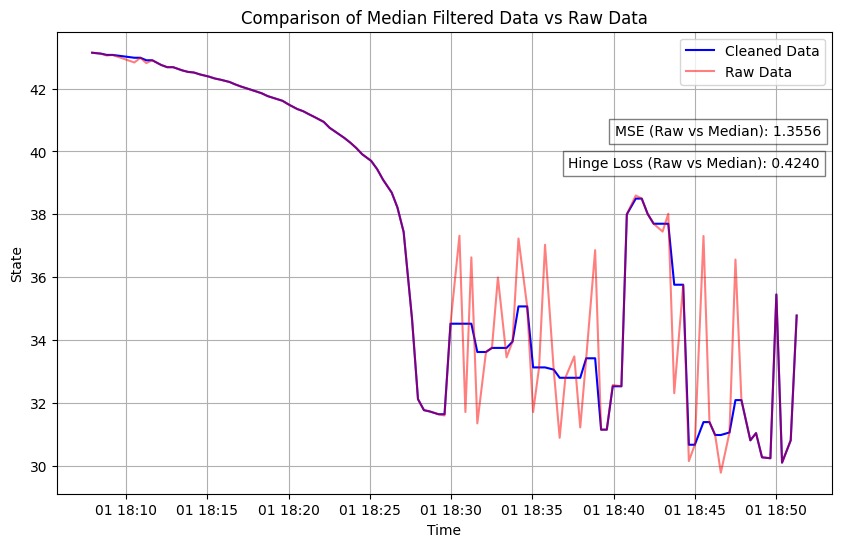

In [166]:
plt.figure(figsize=(10,6))

# Plot cleaned data
plt.plot(cleaned_df['Time'], cleaned_df['State'], label='Cleaned Data', color='blue')

# Plot raw data
plt.plot(raw_df['Time'], raw_df['State'], label='Raw Data', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Comparison of Median Filtered Data vs Raw Data')
plt.legend()
plt.grid(True)

mse_median = calculate_mse(raw_df, cleaned_df, 'State')
mse_text = f"MSE (Raw vs Median): {mse_median:.4f}"
plt.text(0.72, 0.80, mse_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

loss = hinge_loss(raw_df, cleaned_df, 'State', 0.02)

loss_text = f"Hinge Loss (Raw vs Median): {loss:.4f}"
plt.text(0.66, 0.73, loss_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Show the plot
plt.show()

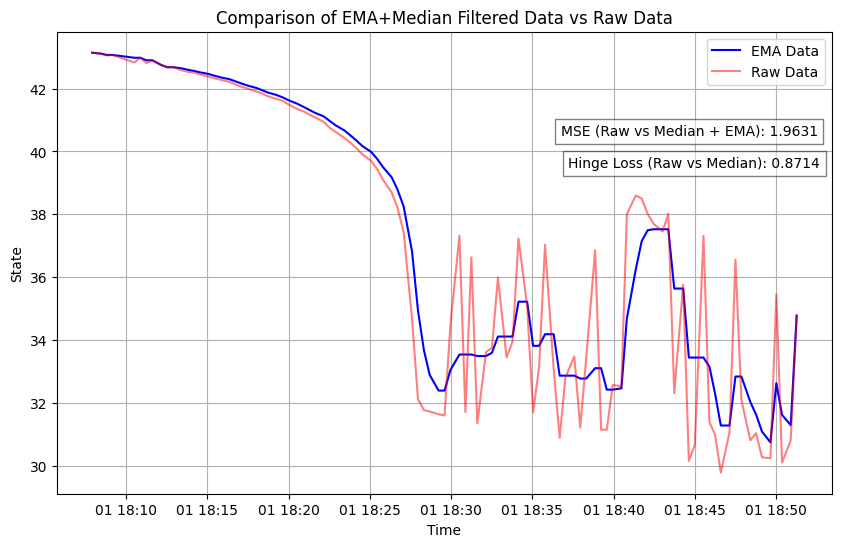

In [168]:
plt.figure(figsize=(10,6))

# Plot cleaned data
plt.plot(ema_df['Time'], ema_df['State'], label='EMA Data', color='blue')

# Plot raw data
plt.plot(raw_df['Time'], raw_df['State'], label='Raw Data', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Comparison of EMA+Median Filtered Data vs Raw Data')
plt.legend()
plt.grid(True)

mse_median = calculate_mse(raw_df, ema_df, 'State')

mse_text = f"MSE (Raw vs Median + EMA): {mse_median:.4f}"
plt.text(0.65, 0.80, mse_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

ema_loss = hinge_loss(raw_df, ema_df, 'State', 0.02)
loss_text = f"Hinge Loss (Raw vs Median): {ema_loss:.4f}"
plt.text(0.66, 0.73, loss_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Show the plot
plt.show()

We can see the median filter + EMA removes more noise